# Artificial Neural Networks (ANNs)
1.   In this tutorial we look at what an artificial neural network (ANN) is by building a simple neuron and using it to attempt to linearly classify some nonlinear data.  
2.   We then extend this to a three layered, fully connected ANN and attempt the classification task again
3.   We shall then teach our ANN to paint a simple picture (which makes it easier to evaluate its performance - qualitatively) and we shall play with some of its basic hyperparameters (number of layers, neurons per layer, number of epochs, activation functions, etc) until it learns to paint at a satisfactory level.



## What are ANNs?

![alt text](https://cdn-images-1.medium.com/max/1200/1*-teDpAIho_nzNShRswkfrQ.gif)

An ANN is made of many interconnected "**neurons**".   

![alt text](https://www.softvision.com/wp-content/uploads/2019/01/Neural_Networks_in_your_browser_1.gif)

Each neuron takes in some floating point numbers (e.g. 1.0, 0.5, -1.0) and multiplies them by some other floating point numbers (e.g. 0.7, 0.6, 1.4) known as **weights** (1.0 * 0.7 = 0.7, 0.5 * 0.6 = 0.3, -1.0 * 1.4 = -1.4).  The weights act as a mechanism to focus on, or ignore, certain inputs.  The weighted inputs then get summed together (e.g. 0.7 + 0.3 + -1.4 = -0.4) along with a **bias** value (e.g. -0.4 + ** -0.1 ** = -0.5).  

The summed value (x) is now transformed into an output value (y) according to the neuron's **activation function**  (y = **f**(x)).  Some popular activation functions are shown below:

![alt text](https://cdn-images-1.medium.com/max/1600/1*RD0lIYqB5L2LrI2VTIZqGw.png)

e.g. -0.5 --> -0.05 if we use the **Leaky Rectified Linear Unit (Leaky ReLU)** activation function: y = f(x) = f(-0.5) = max(0.1*-0.5, -0.5) = max(-0.05, -0.5) = -0.05

In larger ANNs with many layers, the neuron's output value (e.g. -0.05) would become the input for another neuron.

![alt text](https://www.16bit.ai/static/img/loading.gif)

![alt text](https://www.neuraldesigner.com/images/deep_neural_network.png)

However, one of the first ANNs was known as the perceptron and it consisted of only a single neuron.  

![alt text](https://cdn-images-1.medium.com/max/1600/1*_Zy1C83cnmYUdETCeQrOgA.png)

The output of the perceptron's neuron acts as the final prediction.

![alt text](https://cdn-images-1.medium.com/fit/t/1600/480/1*gpH4JC6Dqx_hIjrrcrq1Og.gif)

This means that each neuron is a linear binary classifier all on its own (e.g. an output value >= 0 would be the blue class, but an output value < 0 would be the red class)

Lets code our own Perceptron


In [1]:
import numpy as np

class Neuron:
  def __init__(self, n_inputs, bias = 0., weights = None):
    self.b = bias
    if weights: self.ws = np.array(weights)
    else: self.ws = np.random.rand(n_inputs)

  def __call__(self, xs): #calculate the neuron's output: multiply the inputs with the weights and sum the values together, add the bias value, then transform the value via an activation function
    return self._f(xs @ self.ws + self.b)

  def _f(self, x): #activation function (default: leaky_relu)
    return max(x*.1, x)


In [2]:
perceptron = Neuron(n_inputs = 3, bias = -0.1, weights = [0.7, 0.6, 1.4]) #using the same weights and bias value in the example above

In [3]:
perceptron([1.0, 0.5, -1.0]) #using the same inputs (and a leaky relu activation function), lets calculate the output value

-0.04999999999999999

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
test_data = np.random.rand(1000,2)

<Axes: xlabel='x', ylabel='y'>

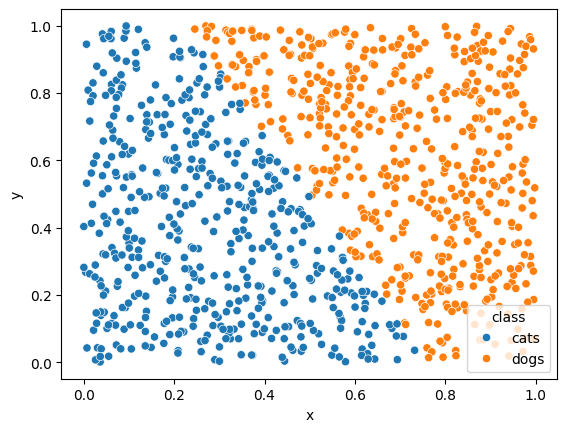

In [6]:
perceptron = Neuron(n_inputs = 2, weights = [-1.3, -0.7], bias = 1.)
test_predictions = [perceptron(test) for test in test_data]
sns.scatterplot(x="x", y="y", hue="class",data=pd.DataFrame({'x':[x for x,_ in test_data], 'y':[y for _,y in test_data], 'class':['cats' if p >= 0.0 else 'dogs' for p in test_predictions]}))

Notice that by adjusting the values of the weights and bias, you can adjust the neuron's decision boundary.   Therefore, a neuron learns by updating its weights and bias to reduce the error of its decisions.

<Axes: xlabel='x', ylabel='y'>

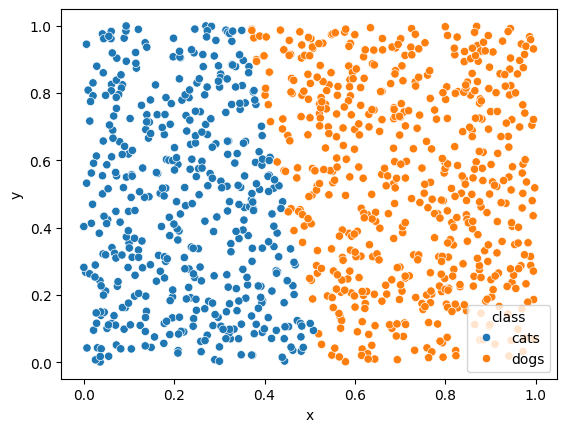

In [7]:
perceptron = Neuron(n_inputs = 2, weights = [-1.7, -0.3], bias = 0.9)
test_predictions = [perceptron(test) for test in test_data]
sns.scatterplot(x="x", y="y", hue="class",data=pd.DataFrame({'x':[x for x,_ in test_data], 'y':[y for _,y in test_data], 'class':['cats' if p >= 0.0 else 'dogs' for p in test_predictions]}))

![alt text](https://cdn-images-1.medium.com/max/1600/1*Hz76FfcofSRNPLJUZR6YKg.gif)

So why do we need so many neurons in an ANN if one will suffice?  Well, individual neurons are unable to classify non-linearly separable data because they can only ever learn a linear decision boundary.
However, by combining neurons together, we essentially combine their decision boundaries.  Therefore, an ANN composed of many neurons is able to learn non-linear decision boundaries.


Neurons are connected together according to a specific network architecture.  Though there are different architectures, nearly all of them contain **layers**.  (Neurons in the same layer do not connect with one another.)



![alt text](https://cdn-images-1.medium.com/max/1600/1*_M4bZyuwaGby6KMiYVYXvg.jpeg)

There is typically an input layer (containing a number of neurons equal to the number of input features in the data), an output layer (containing a number of neurons equal to the number of classes) and a hidden layer (containing any number of neurons).  There can be more than one hidden layer  to allow the neural net to learn more complex decision boundaries (Any neural net with more than one hidden layer is considered a deep neural net).
